# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [3]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv")
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
df.shape

(699, 11)

In [7]:
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column
df[df["Bare Nuclei"] == '?']
missing = df[df["Bare Nuclei"] == '?'].index
missing

# Get count of rows having ?


Int64Index([23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321,
            411, 617],
           dtype='int64')

In [10]:
len(missing)

16

In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
df.loc[missing, 'Bare Nuclei'] = float('nan')
df["Bare Nuclei"] = df["Bare Nuclei"].apply(pd.to_numeric)
df.loc[missing, 'Bare Nuclei'] = int(df["Bare Nuclei"].mean())
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [12]:
# Check for correlation of variable
df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.097440,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.588433,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.687417,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709812,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666086,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.582331,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.097440,0.588433,0.687417,0.709812,0.666086,0.582331,1.000000,0.676167,0.577347,0.339844,0.817442
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.676167,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577347,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.339844,0.344169,0.428336,1.000000,0.423170


In [13]:
#Let us check for pair plots

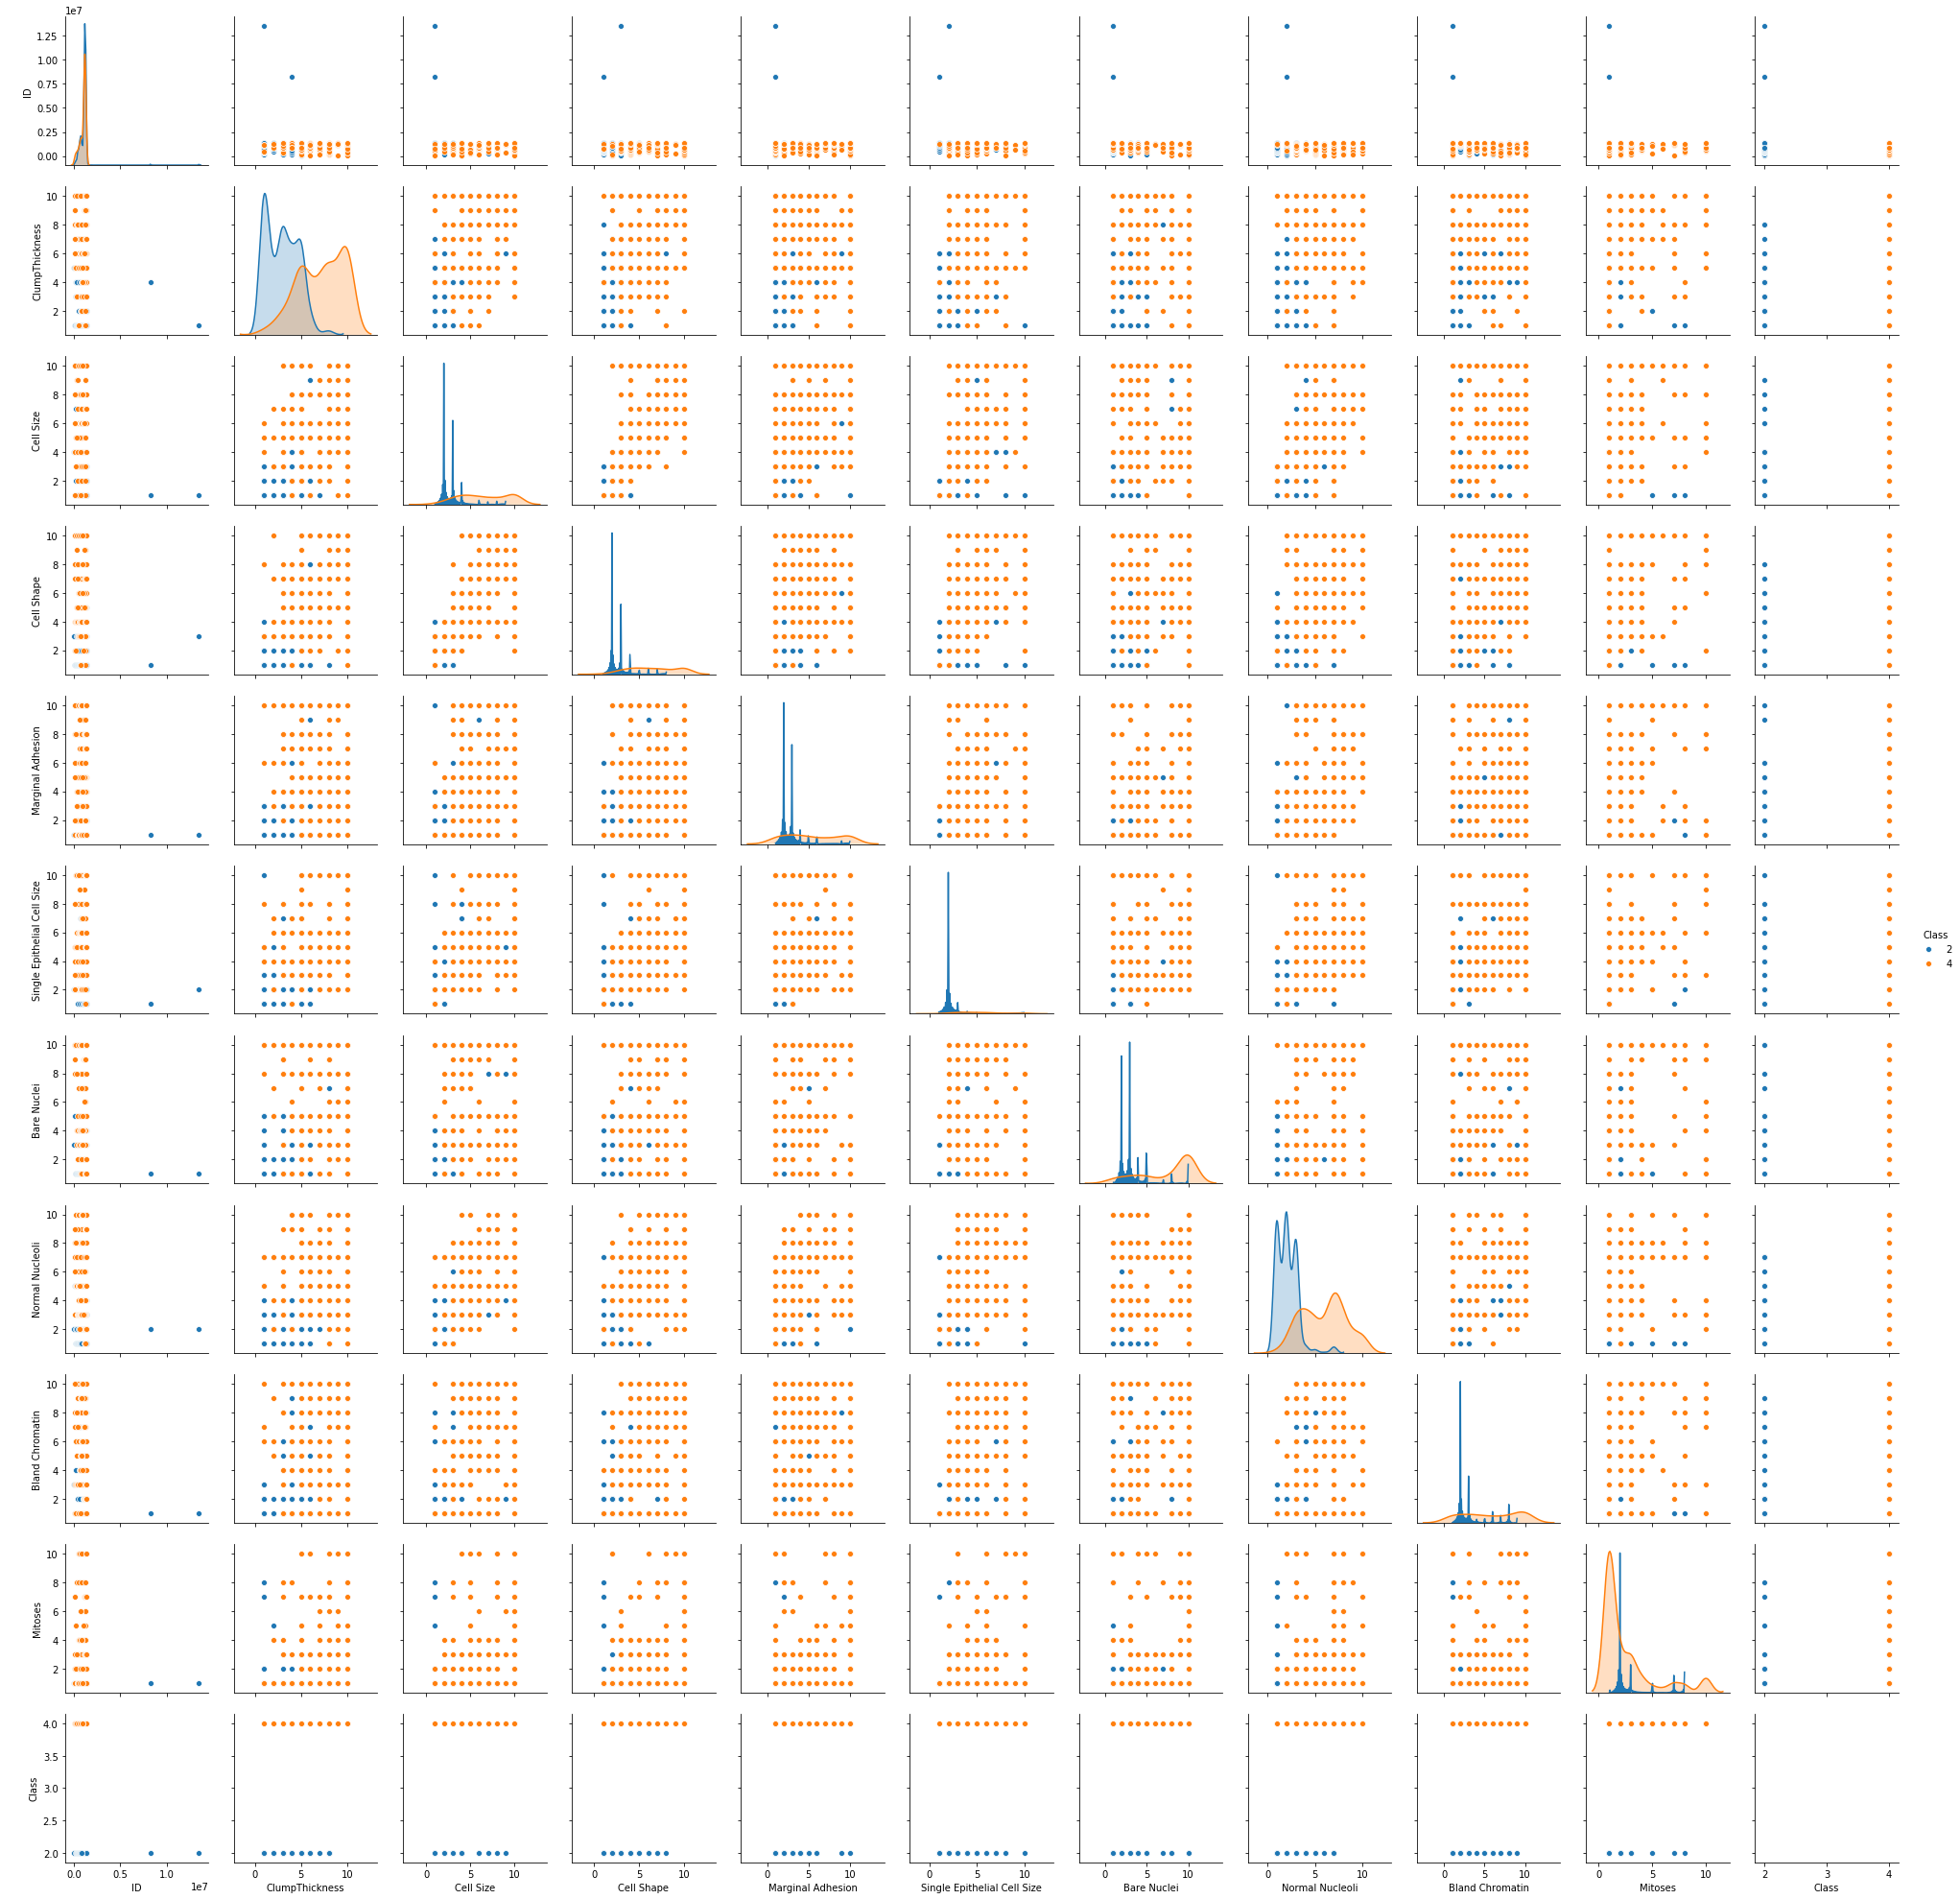

In [14]:
sns.pairplot(df, hue="Class")

In [15]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [16]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [17]:
# We could see most of the outliers are now removed.

In [18]:
df.drop('ID', inplace=True, axis=1)

In [19]:
normalized_df = (df - df.mean())/df.std()

In [20]:
df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.532189,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.602774,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q6 Create a covariance matrix for identifying Principal components

In [21]:
# PCA
# Step 1 - Create covariance matrix
X = df.ix[:,0:8].values
Y = df.ix[:,9].values

In [22]:
X_std = scale(X)

In [23]:
covariance_matrix =np.cov(X_std,rowvar=False)
covariance_matrix

array([[1.00143266, 0.64583645, 0.65552689, 0.48705303, 0.52256381,
        0.58927575, 0.5592282 , 0.53660222],
       [0.64583645, 1.00143266, 0.90818117, 0.70659267, 0.75287621,
        0.68840199, 0.75680368, 0.72390044],
       [0.65552689, 0.90818117, 1.00143266, 0.68405782, 0.72069948,
        0.7108287 , 0.73700282, 0.72047704],
       [0.48705303, 0.70659267, 0.68405782, 1.00143266, 0.60045809,
        0.66704   , 0.66767051, 0.60421681],
       [0.52256381, 0.75287621, 0.72069948, 0.60045809, 1.00143266,
        0.58316514, 0.61698451, 0.62978166],
       [0.58927575, 0.68840199, 0.7108287 , 0.66704   , 0.58316514,
        1.00143266, 0.6771358 , 0.57817384],
       [0.5592282 , 0.75680368, 0.73700282, 0.66767051, 0.61698451,
        0.6771358 , 1.00143266, 0.66683179],
       [0.53660222, 0.72390044, 0.72047704, 0.60421681, 0.62978166,
        0.57817384, 0.66683179, 1.00143266]])

# Q7 Identify eigen values and eigen vector

In [24]:
# Step 2- Get eigen values and eigen vector

In [37]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[5.62669775 0.54284507 0.08884156 0.48688518 0.26320244 0.31744438
 0.29855181 0.38699313]


In [38]:
print('Eigenvectors \n%s' %eig_vecs)


Eigenvectors 
[[ 3.11432082e-01  8.73360429e-01  5.90215662e-04  1.32586103e-02
  -2.23501117e-01  2.81046821e-01  1.05093272e-01 -9.52990502e-03]
 [ 3.91329796e-01 -3.24271062e-02  7.34363187e-01  1.79738733e-01
   4.46390759e-01 -7.80964435e-02  2.48771400e-01  8.34457743e-02]
 [ 3.88403346e-01  3.10159985e-02 -6.66187158e-01  1.39953058e-01
   5.88281267e-01 -1.18414897e-01  1.49496651e-01  4.83991206e-02]
 [ 3.40863183e-01 -3.76785551e-01 -4.87953539e-02 -4.60138095e-01
  -7.29315249e-02  6.85697974e-01  2.00534661e-01  1.09644957e-01]
 [ 3.41830870e-01 -1.95088908e-01 -6.97138783e-02  4.82585118e-01
  -4.31777262e-01 -5.76853004e-02 -1.59419359e-01  6.26234639e-01]
 [ 3.45330635e-01  8.93662224e-02  7.71656477e-02 -5.77345623e-01
   7.04882452e-02 -3.38207482e-01 -6.25548464e-01  1.51043538e-01]
 [ 3.58500600e-01 -1.36879277e-01 -5.84034147e-02 -1.81073669e-01
  -4.50743293e-01 -5.13888742e-01  4.83119297e-01 -3.40422297e-01]
 [ 3.43805045e-01 -1.68756510e-01  1.72778302e-02  3.70

# Q8 Find variance and cumulative variance by each eigen vector

In [39]:
sklearn_pca = PCA(n_components=8)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [40]:
variance = sklearn_pca.explained_variance_ratio_ 

cv=np.cumsum(np.round(sklearn_pca.explained_variance_ratio_, decimals=5)*100)

In [41]:
variance

array([0.70233101, 0.06775856, 0.06077358, 0.04830494, 0.03962378,
       0.03726559, 0.03285324, 0.01108931])

In [42]:
cv

array([70.233, 77.009, 83.086, 87.916, 91.878, 95.605, 98.89 , 99.999])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [43]:
sklearn_pca = PCA(n_components=8)
sklearn_pca

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort()
eig_pairs.reverse()

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    

Eigenvalues in descending order:
5.626697750955918
0.5428450744652807
0.486885179201563
0.3869931268305802
0.31744437859796465
0.29855181397258146
0.263202437969053
0.08884155605862713


The plot above clearly shows that most of the variance 99% can be explained by the first 7 principal component 
Hence 8th component can be dropped

# Q10 Find correlation between components and features

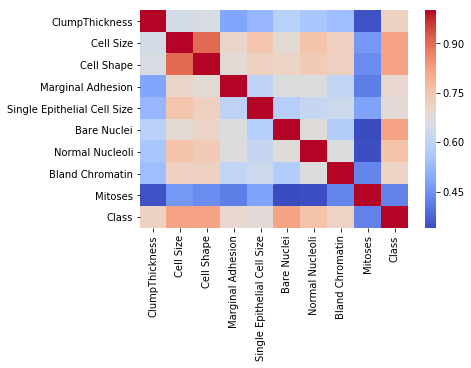

In [48]:
sns.heatmap(df.corr(),cmap='coolwarm')